## Sampling points on the sky



Quite often we find problems in astrophysics that require sampling points on the surface of a sphere representing the sky. One might be tempted to just sample the zenith and azimuthal angles from uniform distributions, but that is NOT correct (try it!).

We are now dealing with a 2D sampling problem, in which we require two coordinates ($\theta, \varphi$). For an isotropic distribution, the probability of any pair of these pairs is the same. Let's take a look at this simplest case.

The probability distribution function can be written as
$$ p(\theta, \varphi) = \iint\limits_{\Omega} d\Omega \propto \int\limits^{2\pi}_0 d\varphi \int^\pi_0 \sin\theta d\theta. $$
We now introduce a new variable ($\xi \in [0, 1]$) that will be useful for the sampling:
$$\xi = \dfrac{1}{2\pi} \int\limits_0^{2\pi} d\varphi \Rightarrow \varphi = 2\pi \xi, $$
and
$$ \xi = \dfrac{1}{2} \int\limits^\pi_0 \sin\theta d\theta \Rightarrow \theta = \cos^{-1}(2\xi - 1). $$

That's all we have to implement, a simple sampling from a uniform distribution (for $\xi$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
n = 5000
phi = 2. * np.pi * np.random.rand(n)
theta = np.arccos(2. * np.random.rand(n) - 1.)

(0.0, 360.0, 1e-05, 1.0)

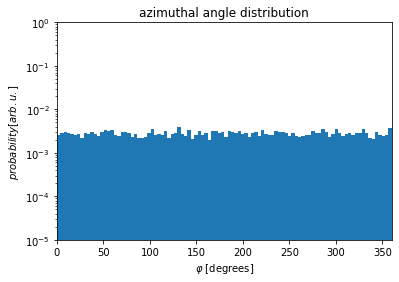

In [47]:
plt.hist(np.degrees(phi), bins = 100, density = True, label = '$\\varphi$')
plt.xlabel('$\\varphi$ [degrees]')
plt.ylabel('$probability [arb. u.]$')
plt.title('azimuthal angle distribution')
plt.yscale('log')
plt.axis([0, 360., 1e-5, 1.])

(0.0, 180.0, 1e-05, 1.0)

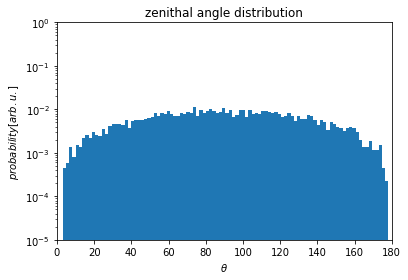

In [48]:
plt.hist(np.degrees(theta), bins = 100, density = True, label = '$\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('$probability [arb. u.]$')
plt.title('zenithal angle distribution')
plt.yscale('log')
plt.axis([0, 180., 1e-5, 1.])

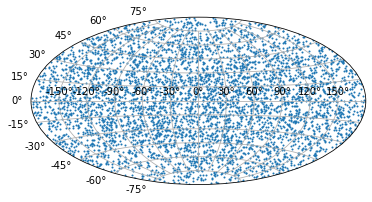

In [49]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.scatter(phi - np.pi, theta - np.pi / 2., s = 1)
plt.grid(True)

Compare the above plot with the one below. It is clear that simplying sampling azimuthal and zenith angles both uniformly is a bad idea.

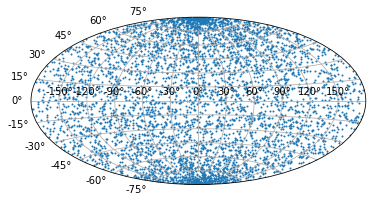

In [50]:
theta_wrong = np.random.uniform(-np.pi / 2., np.pi / 2., n)
phi_wrong = np.random.uniform(-np.pi, np.pi, n)
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.scatter(phi_wrong, theta_wrong, s = 1)
plt.grid(True)